# Predicting the Potability of Water Samples

Water plays a key role to every living being in life. Water plays a key role in major bodily functions from the flow of blood in our bodies to maintaining body temperature. Water is also used in several industries such as in food and medicine. Water also provides habitats for several species of animals as both a supply of drinking water as well as a place to live in.

Hence, it is imperative that the water we have at hand is clean and safe to consume, which in today's day and age is not as common as we would think it to be. This project takes samples from several sources of water and focuses on predicting whether a given sample of water is potable or not based on several factors given to us.

In [1]:
library(ggplot2)
library(mice)
library(missForest)
library(corrplot)
library(moments)
library(rpart)
library(rpart.plot)
library(pROC)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'mice' was built under R version 4.3.3"
Warning message in check_dep_version():
"ABI version mismatch: 
lme4 was built with Matrix ABI version 1
Current Matrix ABI version is 0
Please re-install lme4 from source or restore original 'Matrix' package"

Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind


Warning message:
"package 'missForest' was built under R version 4.3.3"
Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.92 loaded

Warning message:
"package 'rpart' was built under R version 4.3.3"
Warning message:
"package 'rpart.plot' was built under R version 4.3.3"
Warning message:
"package 'pROC' was built under R version 4.3.3"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package

In [2]:

water.quality <- read.csv('C:/Users/ashis/Downloads/water_potability.csv')
head(water.quality)
summary(water.quality)
nrow(water.quality)
dim(water.quality)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
2,3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
3,8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5,9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.093   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.037   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 8.062   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
 NA's   :491                                                         
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :181.5   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:307.7   1st Qu.:365.7   1st Qu.:12.07   1st Qu.: 55.845  
 Median :333.1   Median :421.9   Median :14.22   Median : 66.622  
 Mean   :333.8   Mean   :426.2   Mean   :14.28   Mean   : 66.396  
 3rd Qu.:360.0   3rd Qu.:481.8   3rd Qu.:16.56   3rd Qu.: 77.337  
 Max.   :481.0   Max.   :753.3   Max. 

[1] 3276

[1] 3276   10

In [3]:
sum(apply(water.quality, 1, anyNA))
sum(is.na(water.quality$ph))
sum(is.na(water.quality$Hardness))
sum(is.na(water.quality$Solids))
sum(is.na(water.quality$Chloramines))
sum(is.na(water.quality$Sulfate))
sum(is.na(water.quality$Conductivity))
sum(is.na(water.quality$Organic_carbon))
sum(is.na(water.quality$Trihalomethanes))
sum(is.na(water.quality$Turbidity))
sum(is.na(water.quality$Potability))

[1] 1265

[1] 491

[1] 0

[1] 0

[1] 0

[1] 781

[1] 0

[1] 0

[1] 162

[1] 0

[1] 0

Our dataset has missing values in the pH, Sulfate and trihalomethanes columns. This will have to be either dropped or imputed

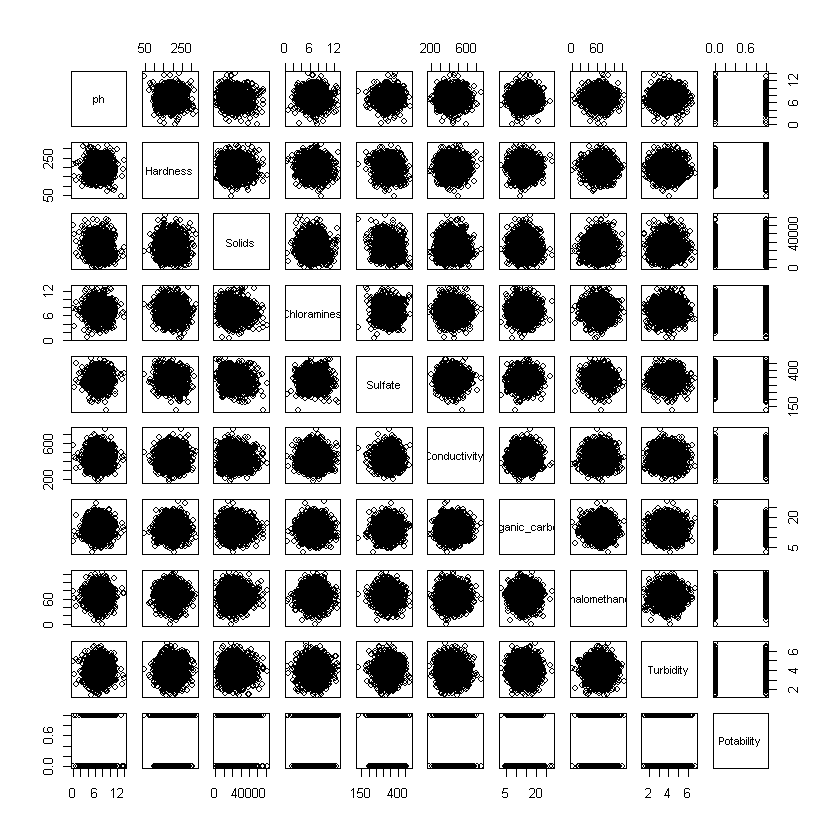

In [4]:
pairs(water.quality)


Since the pH, Sulfate and Trihalomethanes Columns have null values, we have to impute them. For this we make use of the mice package to both visualize and impute the missing data.

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,Trihalomethanes,ph,Sulfate,
2011,1,1,1,1,1,1,1,1,1,1,0
638,1,1,1,1,1,1,1,1,1,0,1
362,1,1,1,1,1,1,1,1,0,1,1
103,1,1,1,1,1,1,1,1,0,0,2
105,1,1,1,1,1,1,1,0,1,1,1
31,1,1,1,1,1,1,1,0,1,0,2
17,1,1,1,1,1,1,1,0,0,1,2
9,1,1,1,1,1,1,1,0,0,0,3
,0,0,0,0,0,0,0,162,491,781,1434


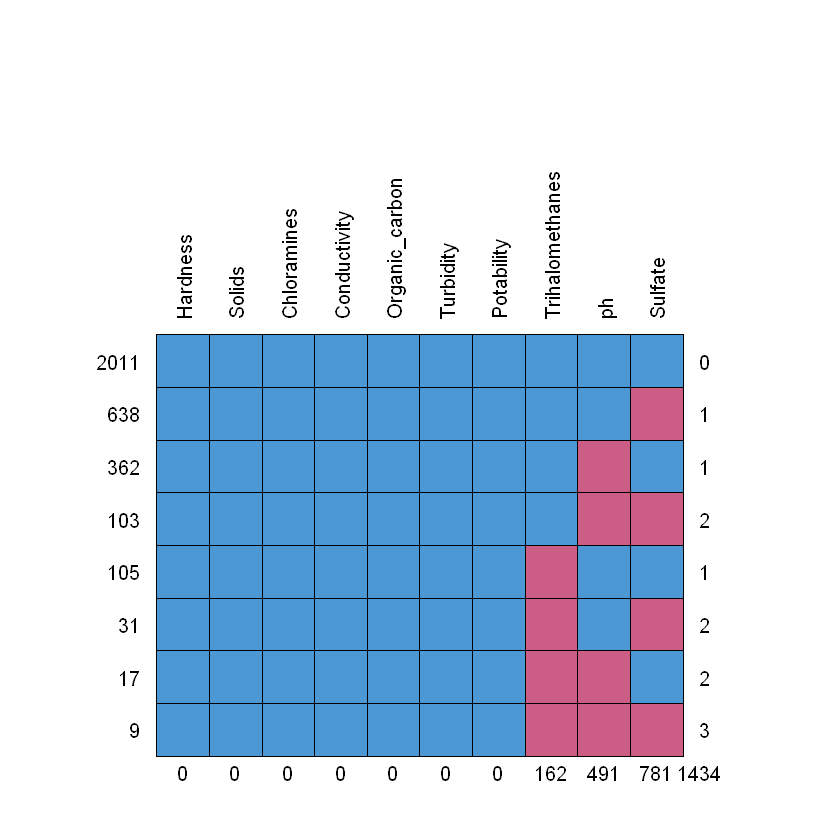

In [5]:
# Impute missing data using mice
md.pattern(water.quality, rotate.names = TRUE)

The above shows us the missing values in our dataset.

Blue means no missing value, and red means missing value.

The numbers on the left show the number of instances of a particular pattern of missing values occurring in the dataset.

The numbers on the right are equal to the number of missing values in each pattern (notice the number of red squares)

The numbers at the bottom record the total number of missing values for each variable

We use the random forest method to to impute the missing data points

In [6]:
# Alternative imputing methods (median, pmm, CART and lasso normalization)
# water.quality$ph[is.na(water.quality$ph)] <- median(water.quality$ph, na.rm = TRUE)
# water.quality$Sulfate[is.na(water.quality$Sulfate)] <- median(water.quality$Sulfate, na.rm = TRUE)
# water.quality$Trihalomethanes[is.na(water.quality$Trihalomethanes)] <- median(water.quality$Trihalomethanes, na.rm = TRUE)

# water.quality <- complete(mice(water.quality, method="pmm"))
# water.quality <- complete(mice(water.quality, method="cart"))
# water.quality <- complete(mice(water.quality, method="lasso.norm"))

water.quality_original <- water.quality

Random.seed <- c("Mersenne-Twister", 530)
set.seed(530)
imputation_result <- missForest(water.quality, xtrue = water.quality_original)
water.quality <- imputation_result$ximp


 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,
3276,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0


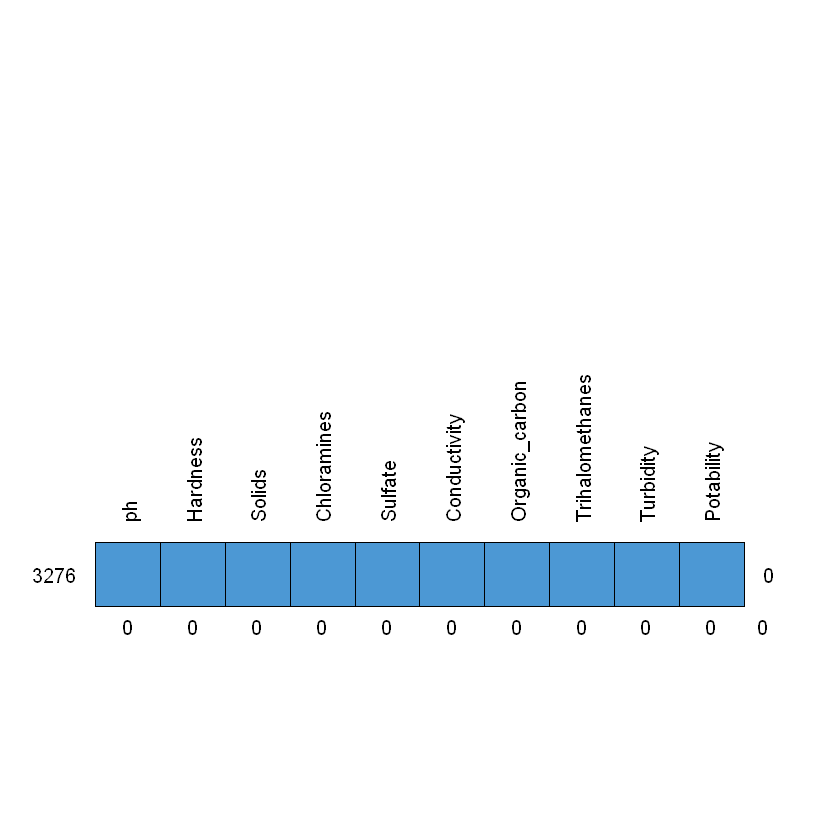

In [7]:
md.pattern(water.quality, rotate.names = TRUE)

# Exploratory Data Analysis

We will first be looking into the description of how our dataset is in terms of potable and not-potable water.

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


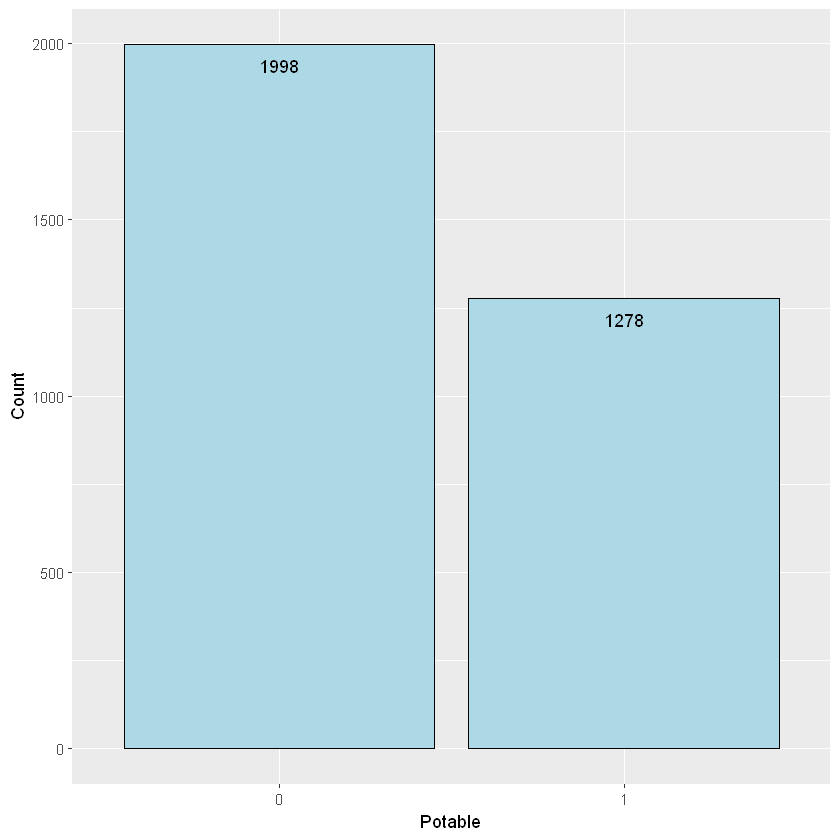

In [8]:
ggplot(water.quality) + geom_bar(aes(x = factor(Potability)), fill='lightblue', color='black', stat='count') +
  geom_text(stat='count',aes(x = factor(Potability), label=..count..), vjust=2) +
  xlab('Potable') + ylab('Count')

In [9]:
print("Non-Potable")
summary(subset(water.quality, Potability == 0))
print("Potable")
summary(subset(water.quality, Potability == 1))

[1] "Non-Potable"


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 98.45   Min.   :  320.9   Min.   : 1.684  
 1st Qu.: 6.175   1st Qu.:177.82   1st Qu.:15663.1   1st Qu.: 6.156  
 Median : 7.079   Median :197.12   Median :20809.6   Median : 7.090  
 Mean   : 7.091   Mean   :196.73   Mean   :21777.5   Mean   : 7.092  
 3rd Qu.: 7.985   3rd Qu.:216.12   3rd Qu.:27006.2   3rd Qu.: 8.066  
 Max.   :14.000   Max.   :304.24   Max.   :61227.2   Max.   :12.653  
    Sulfate       Conductivity   Organic_carbon   Trihalomethanes  
 Min.   :203.4   Min.   :181.5   Min.   : 4.372   Min.   :  0.738  
 1st Qu.:317.1   1st Qu.:368.5   1st Qu.:12.101   1st Qu.: 56.442  
 Median :333.6   Median :422.2   Median :14.294   Median : 66.418  
 Mean   :334.5   Mean   :426.7   Mean   :14.364   Mean   : 66.318  
 3rd Qu.:350.7   3rd Qu.:480.7   3rd Qu.:16.649   3rd Qu.: 76.538  
 Max.   :460.1   Max.   :753.3   Max.   :28.300   Max.   :120.030  
   Turbidity       Potability
 Min

[1] "Potable"


       ph             Hardness          Solids         Chloramines    
 Min.   : 0.2275   Min.   : 47.43   Min.   :  728.8   Min.   : 0.352  
 1st Qu.: 6.3478   1st Qu.:174.33   1st Qu.:15669.0   1st Qu.: 6.094  
 Median : 7.0455   Median :196.63   Median :21199.4   Median : 7.215  
 Mean   : 7.0736   Mean   :195.80   Mean   :22384.0   Mean   : 7.169  
 3rd Qu.: 7.7865   3rd Qu.:218.00   3rd Qu.:27973.2   3rd Qu.: 8.199  
 Max.   :13.1754   Max.   :323.12   Max.   :56488.7   Max.   :13.127  
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :201.6   Min.   : 2.20   Min.   :  8.176  
 1st Qu.:310.6   1st Qu.:360.9   1st Qu.:12.03   1st Qu.: 56.911  
 Median :333.3   Median :420.7   Median :14.16   Median : 66.718  
 Mean   :332.7   Mean   :425.4   Mean   :14.16   Mean   : 66.557  
 3rd Qu.:356.4   3rd Qu.:484.2   3rd Qu.:16.36   3rd Qu.: 77.067  
 Max.   :481.0   Max.   :695.4   Max.   :23.60   Max.   :124.000  
   Turbidity       Potability
 Min

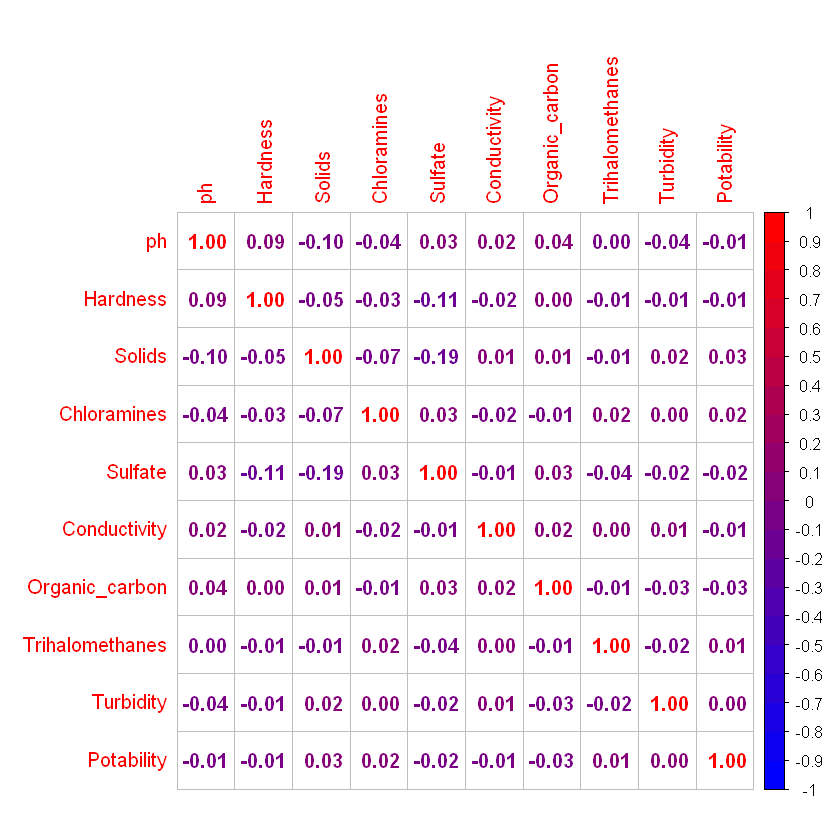

In [10]:
correlations <- cor(water.quality)
corrplot(correlations, method="number", col=colorRampPalette(c("blue","red"))(20))


All the features have very weak correlations with one another. Hence they are independent of one another.

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


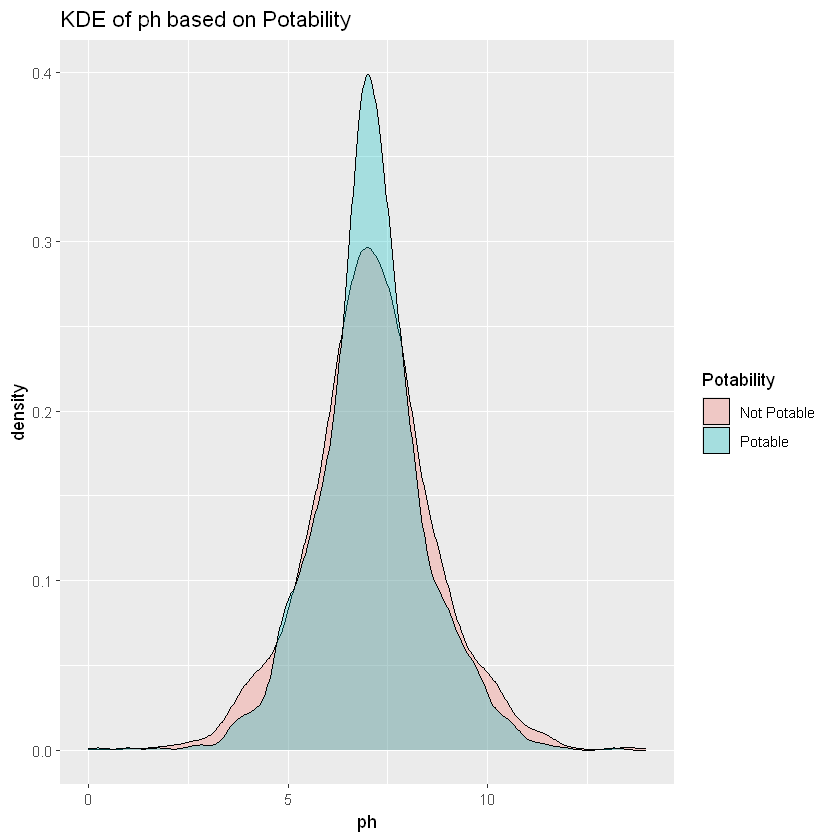

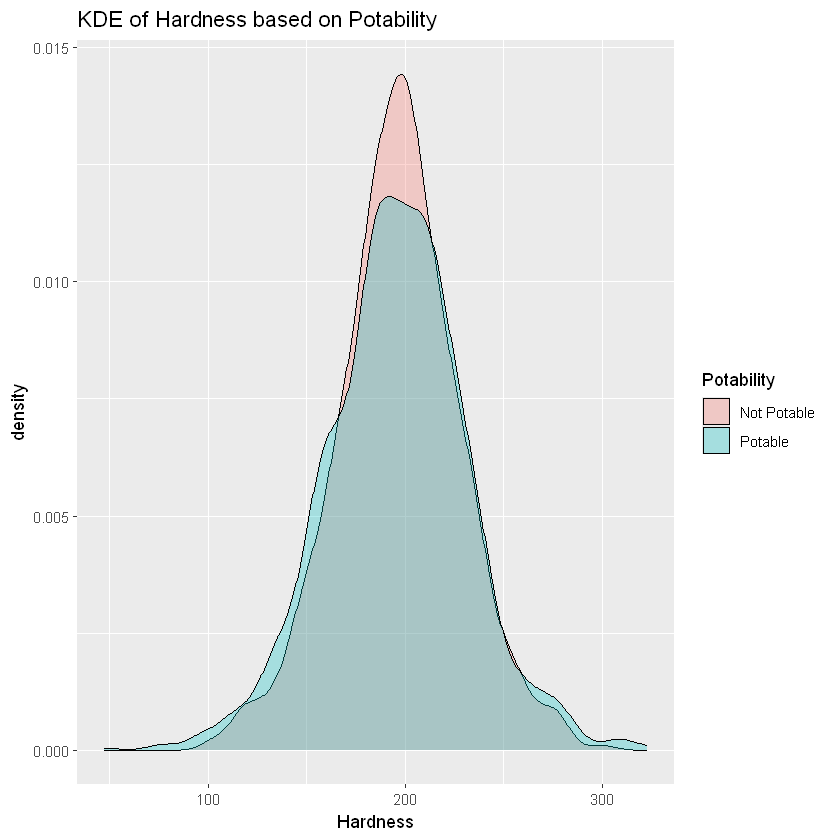

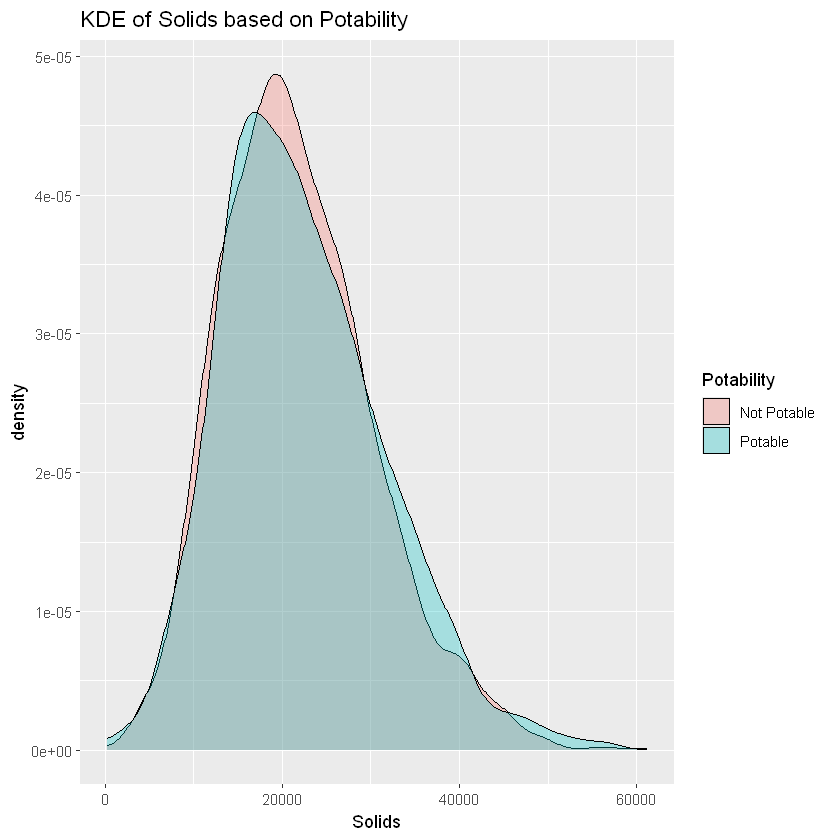

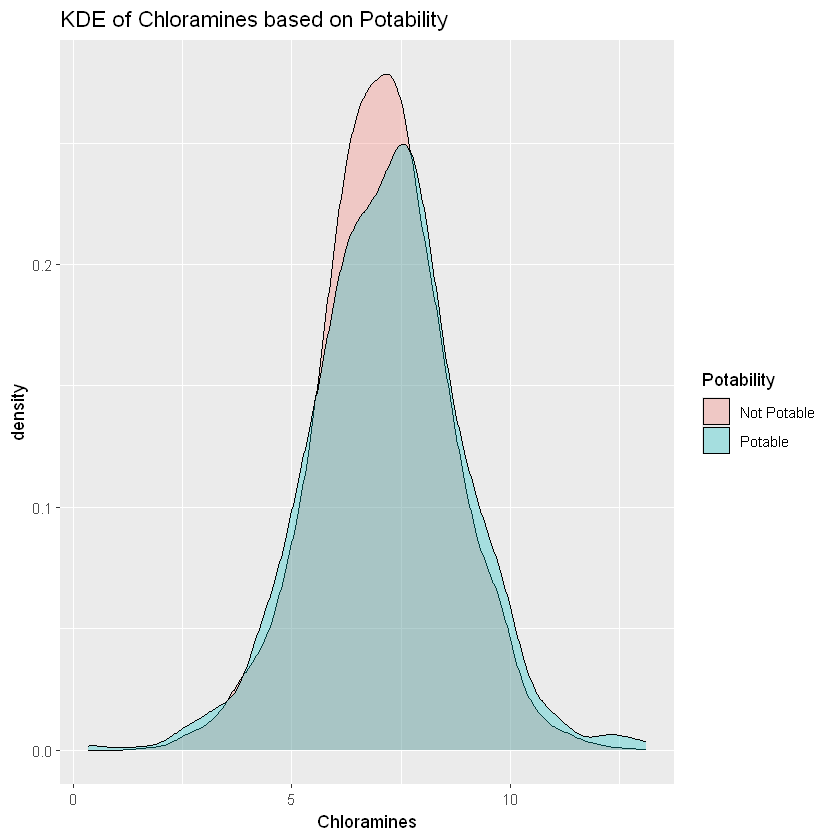

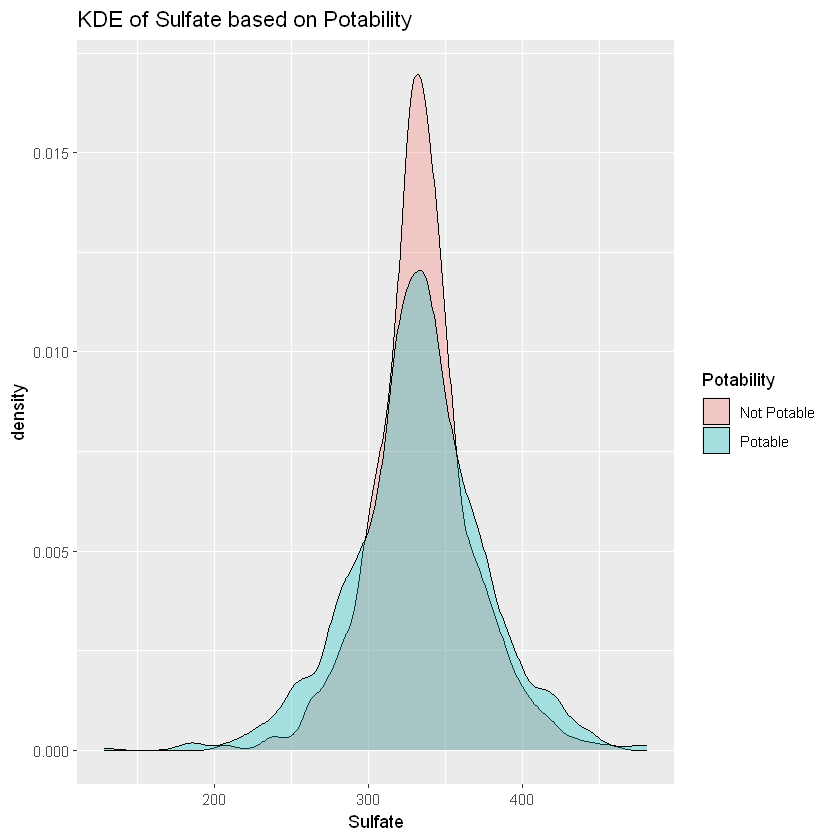

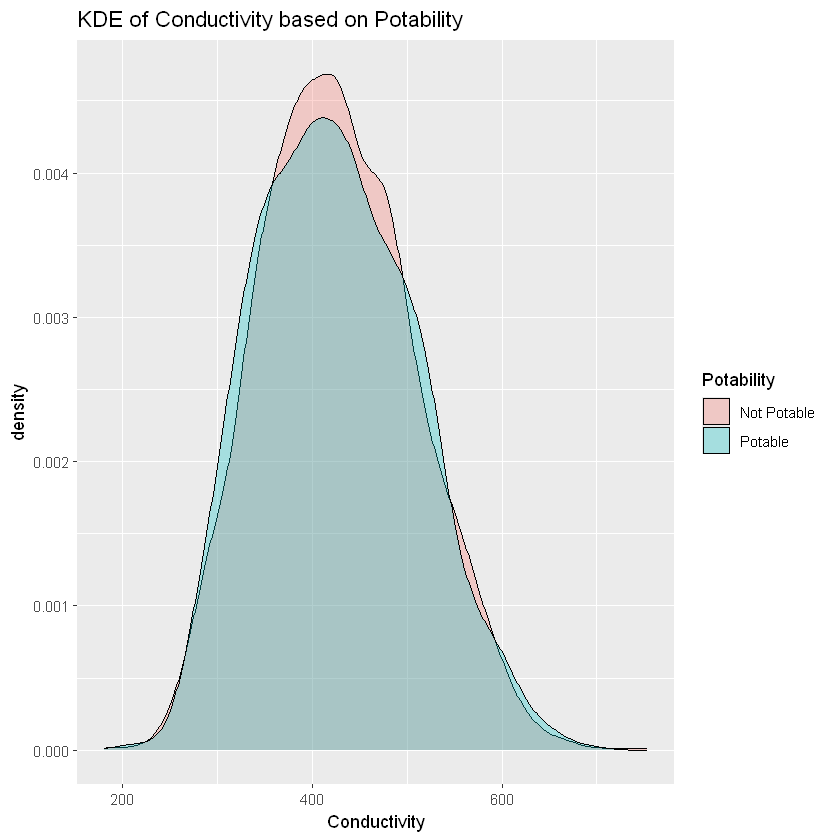

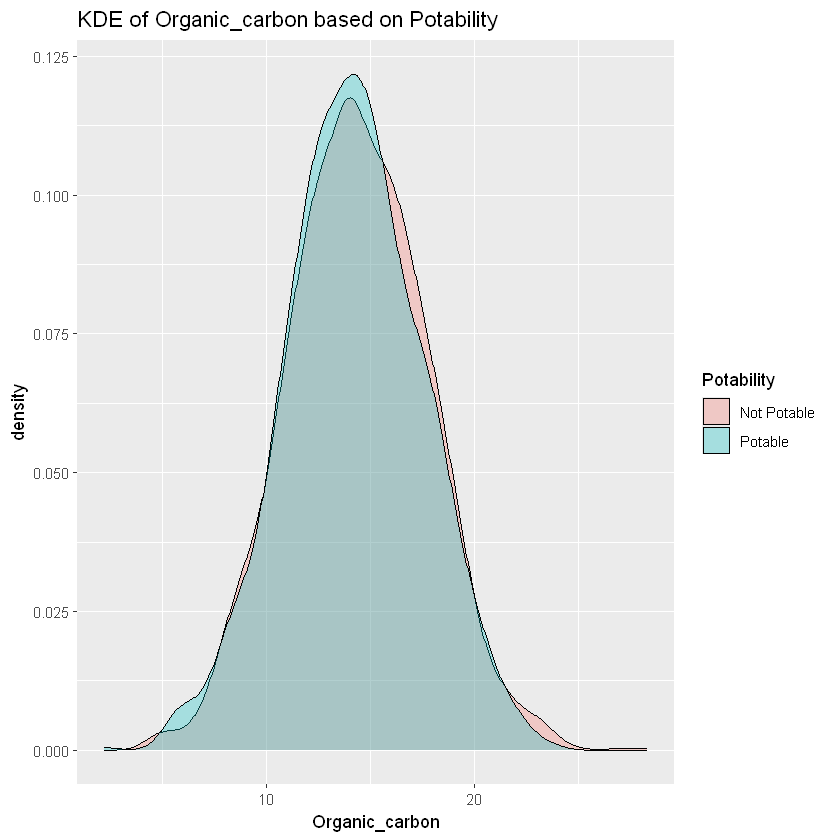

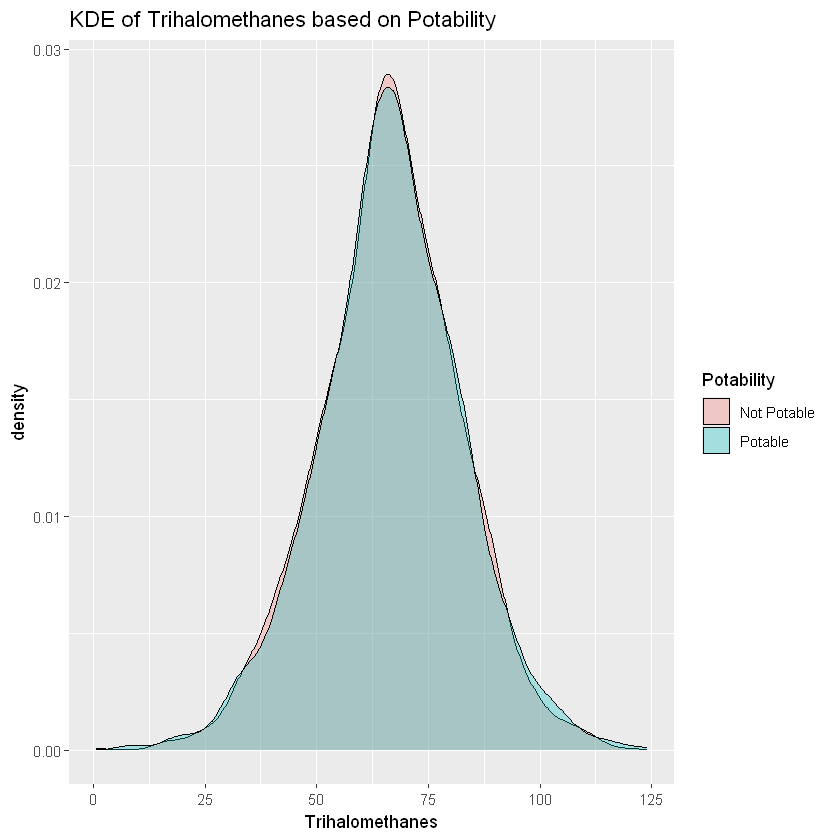

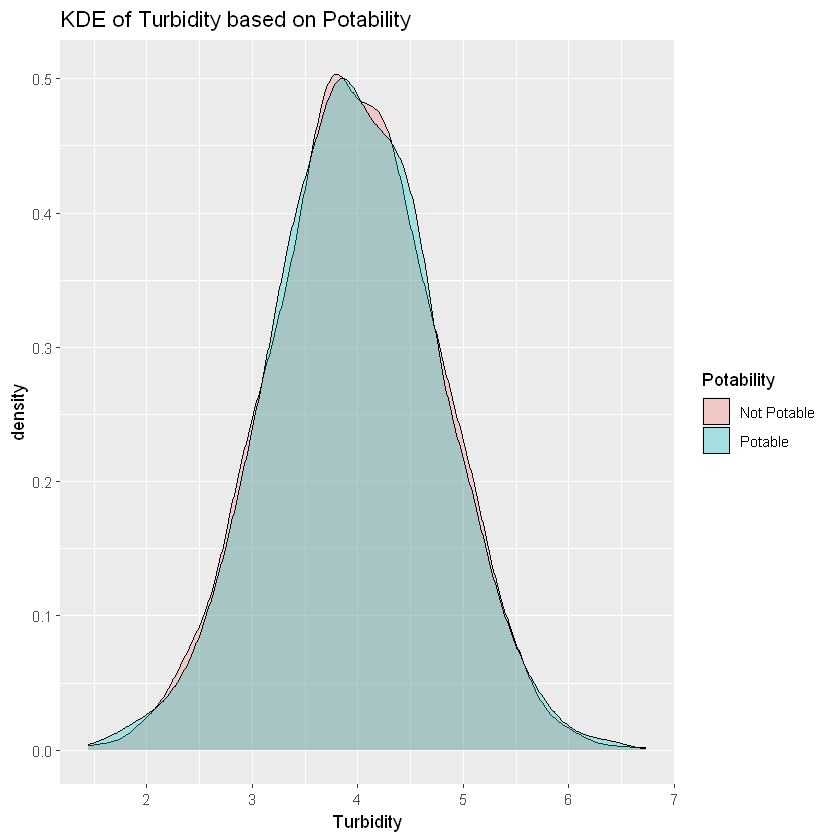

In [11]:
features <- c("ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity")
for (feature in features) {
  p <- ggplot(water.quality, aes_string(x=feature, fill="factor(Potability)")) + 
    geom_density(alpha = 0.3) +
    labs(title = paste("KDE of", feature, "based on Potability"), x = feature) +
    scale_fill_discrete(name = "Potability", labels = c("Not Potable", "Potable"))
  print(p)
}

In [12]:
skewness_values <- sapply(water.quality[, 1:9], skewness)
print(skewness_values)

kurtosis_values <- sapply(water.quality[, 1:9], kurtosis)
print(kurtosis_values)

             ph        Hardness          Solids     Chloramines         Sulfate 
    0.020766315    -0.039323689     0.621349818    -0.012092900    -0.045991521 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity 
    0.264369105     0.025520890    -0.087586712    -0.007813063 
             ph        Hardness          Solids     Chloramines         Sulfate 
       4.215267        3.613001        3.440320        3.587170        4.491691 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity 
       2.721499        3.042511        3.394568        2.935464 


Hence from the above values we can see that the features have close to normal distributions.

# Building our Models

We will now focus on building our classification models to see which one would give us a better result. In this case we will have to take two splits of our dataset:

- 50/50
- 80/20

And compare our methods at each split. We will also make use of 5-fold cross validation whenever it is needed.

## Model 1: Logistic Regression

The first method we are choosing is Logistic Regression. Logistic regression is good for dealing with data that has a binary output and works based on a sigmoid function, as it considers the log odds. If we were to try to fit such data with a normal linear regression model, it would produce probability values less than 0 or greater than 1, which would not make sense given that our outputs are fixed binary values.

In [13]:
Random.seed <- c("Mersenne-Twister", 530)
set.seed(530)
indices <- sample(1:nrow(water.quality), 0.5 * nrow(water.quality), replace = FALSE)
train_set <- water.quality[indices, ]
test_set <- water.quality[-indices, ]

logit.train <- glm(Potability ~ ., data=train_set, family = "binomial")
summary(logit.train)


Call:
glm(formula = Potability ~ ., family = "binomial", data = train_set)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)     -4.136e-01  8.853e-01  -0.467    0.640
ph               5.887e-03  3.507e-02   0.168    0.867
Hardness         3.711e-04  1.581e-03   0.235    0.814
Solids           7.326e-06  5.863e-06   1.250    0.211
Chloramines      7.128e-04  3.261e-02   0.022    0.983
Sulfate         -8.104e-04  1.449e-03  -0.559    0.576
Conductivity     5.351e-04  6.375e-04   0.839    0.401
Organic_carbon  -1.082e-02  1.573e-02  -0.688    0.492
Trihalomethanes -2.351e-03  3.150e-03  -0.746    0.455
Turbidity        7.501e-03  6.448e-02   0.116    0.907

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2188.3  on 1637  degrees of freedom
Residual deviance: 2184.4  on 1628  degrees of freedom
AIC: 2204.4

Number of Fisher Scoring iterations: 4


The above shows the estimated model for a 50/50 train test split, and how it fits the given data.

The null deviance, residual deviance, and the Akaike information criterion give us the indications as to how well our model fits the data.

**Null Deviance** tells us how well the target is predicted by the intercept term by itself.

**Residual Deviance** tells us how well the model fits the data with all independent variables.

The deviance residual is -2 * log likelihood, which we find below

In [14]:
logLik(logit.train)

'log Lik.' -1092.206 (df=10)

These measures can tell us if a model with the predictors do a better job of fitting the data than one with just an intercept (null model). For this we do the chi-square test. If we get a smaller p-value for this test, the model holds a high significance.

In [15]:
with(logit.train, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 0.9201406

Here we can see that the p-value is high, which means that our model isn't doing a good job in predicting the potability of the water sample.

Let's see the accuracy and other characteristics of our model. We first do so using our testing dataset.

In [16]:
head(test_set)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,3.716080,129.4229,18630.06,6.635246,336.5433,592.8854,15.180013,56.32908,4.500656,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
8,8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.363817,62.79831,4.401425,0
9,6.810541,118.9886,14285.58,7.804174,268.6469,389.3756,12.706049,53.92885,3.595017,0
10,11.180284,227.2315,25484.51,9.077200,404.0416,563.8855,17.927806,71.97660,4.370562,0


In [17]:
dim(test_set)

[1] 1638   10

In [18]:
predictions <- predict(logit.train, test_set, type="response")
predictions.binary <- ifelse(predictions > 0.5, 1, 0)
cftable <- table(predictions.binary, test_set$Potability)

accuracy <- sum(diag(cftable))/sum(cftable)
sensitivity<-cftable[1]/(cftable[1] + cftable[2])
specificity <- cftable[4]/(cftable[3] + cftable[4])
ppv <- cftable[1]/(cftable[1] + cftable[3])
npv <- cftable[4]/(cftable[2] + cftable[4])
print(cftable)
sprintf("accuracy = %s", accuracy)
sprintf("sensitivity = %s", sensitivity)
sprintf("specificity = %s", specificity)
sprintf("ppv = %s", ppv)
sprintf("npv = %s", npv)

                  
predictions.binary   0   1
                 0 996 641
                 1   0   1


[1] "accuracy = 0.608669108669109"

[1] "sensitivity = 1"

[1] "specificity = 0.00155763239875389"

[1] "ppv = 0.608430054978619"

[1] "npv = 1"

We now check our model's work on the training dataset.

In [19]:
predictions <- predict(logit.train, train_set, type="response")
predictions.binary <- ifelse(predictions > 0.5, 1, 0)
cftable <- table(predictions.binary, train_set$Potability)
accuracy <- sum(diag(cftable))/sum(cftable)
sensitivity<-cftable[1]/(cftable[1] + cftable[2])
specificity <- cftable[4]/(cftable[3] + cftable[4])
ppv <- cftable[1]/(cftable[1] + cftable[3])
npv <- cftable[4]/(cftable[2] + cftable[4])
print(cftable)
sprintf("accuracy = %s", accuracy)
sprintf("sensitivity = %s", sensitivity)
sprintf("specificity = %s", specificity)
sprintf("ppv = %s", ppv)
sprintf("npv = %s", npv)

                  
predictions.binary    0    1
                 0 1002  636


[1] "accuracy = 0.611721611721612"

[1] "sensitivity = 0.611721611721612"

[1] "specificity = NA"

[1] "ppv = NA"

[1] "npv = NA"

The results are as shown below

#### Results of Logistic Regression Model

**Model:**
$$
\begin{align*}
\text{Potability} = logit(p) =
&-4.136 \times 10^{-1}
+ (5.887 \times 10^{-3} \times \text{ph})
+ (3.711 \times 10^{-4} \times \text{hardness})
+ (7.326 \times 10^{-6} \times \text{Solids}) \\
&+ (7.128 \times 10^{-4} \times \text{Chloramines})
- (8.104 \times 10^{-4} \times \text{Sulfate})
+ (5.351 \times 10^{-4} \times \text{Conductivity}) \\
&- (1.082 \times 10^{-2} \times \text{Organic\_ carbon})
- (2.351 \times 10^{-3} \times \text{Trihalomethanes})
+ (7.501 \times 10^{-3} \times \text{Turbidity})
\end{align*}
$$

**Model Performance:**

| Dataset | Accuracy | Sensitivity | Specificity | PPV | NPV |
| ------- | -------- | ----------- | ----------- | --- | --- |
| Test | 0.608669108669109 | 1 | 0.00155763239875389 | 0.608430054978619 | 1 |
| Train | 0.611721611721612 | 0.611721611721612 | NA | NA | NA |
